# Clustering - K-Means

In [1]:
# Importamos las librerías necesarias

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Cargamos los datos

# Cargar el conjunto de datos
data_url = 'https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/Country-data.csv'
df = pd.read_csv(data_url)

df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Antes de aplicar el algoritmo K-Means, necesitamos preprocesar los datos. Este conjunto de datos tiene una característica categórica, "country", que no se puede usar directamente en el algoritmo K-Means, ya que este algoritmo se basa en cálculos de distancia y necesita características numéricas. Entonces, vamos a eliminar esa columna.

Además, los datos tienen diferentes rangos. Como K-Means se basa en la distancia, las características con rangos más grandes tendrán un impacto mayor en los resultados. Para evitar esto, normalizaremos los datos para que todas las características tengan el mismo rango.

In [3]:
# Normalizar los datos
from sklearn.preprocessing import StandardScaler

# Eliminar la columna country

df = df.drop('country', axis=1)

# Normalizar los datos

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

Estas líneas de código eliminarán la columna "country" y normalizarán los datos. El resultado será un DataFrame de pandas donde todas las características son numéricas y tienen el mismo rango.

/Users/adrianinfantesromero/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/adrianinfantesromero/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/adrianinfantesromero/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/adrianinfantesromero/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

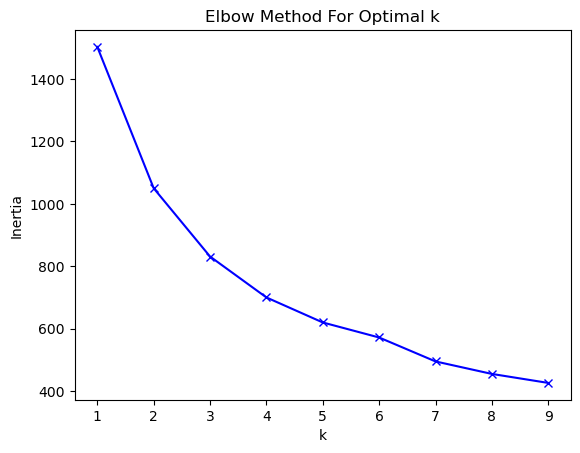

In [6]:
# Determinar el número de clusters

# El algoritmo K-Means requiere que especifiquemos el número de clusters en los que queremos agrupar los datos. Una técnica común para determinar el número adecuado de clusters es el método del codo. Esto implica ejecutar K-Means para diferentes números de clusters y calcular la suma de las distancias al cuadrado (también conocida como inercia) de cada punto a su centroide más cercano. Cuando se grafica la inercia en función del número de clusters, el "codo" del gráfico representa un buen equilibrio entre aumentar el número de clusters y minimizar la inercia.

# Lista de inercias

from sklearn.cluster import KMeans

inertia = []

# Rango de valores K (número de clusters) a probar:

k_range = range(1, 10)

# Ejecutar K-Means para cada valor de K y guardar la inercia en la lista inertia

for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    inertia.append(model.inertia_)

# Graficar la inercia en función del número de clusters
plt.plot(k_range, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

Este código crea una gráfica de la inercia en función del número de clusters. La ubicación del "codo" en la gráfica te dará una idea de cuántos clusters deberías usar para K-Means. Intenta ejecutar este código y ver qué número de clusters parece ser el más apropiado.

Aplicar el algoritmo K-Means

Ahora que ya tienes un buen candidato para el número de clusters, podemos aplicar el algoritmo K-Means con ese número.

In [7]:
# inicializamos el algoritmo K-Means con el número de clusters que queremos

model = KMeans(n_clusters=9, random_state=0) # 9 clusters, 0 es la semilla aleatoria. No usamos la semilla aleatoria por defecto porque queremos que los resultados sean reproducibles.

# Ajustamos el modelo a los datos normalizados

model.fit(df_scaled)

# Obtenemos las etiquetas de los clusters para cada punto de datos

labels = model.labels_

/Users/adrianinfantesromero/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


En este código, estamos inicializando el algoritmo K-Means para agrupar los datos en 9 clusters. Luego ajustamos el algoritmo a nuestros datos y obtenemos una etiqueta de cluster para cada punto de datos.

Finalmente, puedes agregar las etiquetas de los clusters a tu DataFrame original para ver qué cluster ha sido asignado a cada observación.

In [8]:
# Añadir las etiquetas de los clusters al DataFrame original

df['Cluster'] = labels

Análisis e interpretación de los clusters

En este punto, empezamos a explorar los clusters para ver si puedes encontrar patrones interesantes. Una buena forma de hacer esto es usando visualizaciones.

Puedes hacer un diagrama de dispersión usando las primeras dos componentes principales, coloreando los puntos según su asignación de cluster.

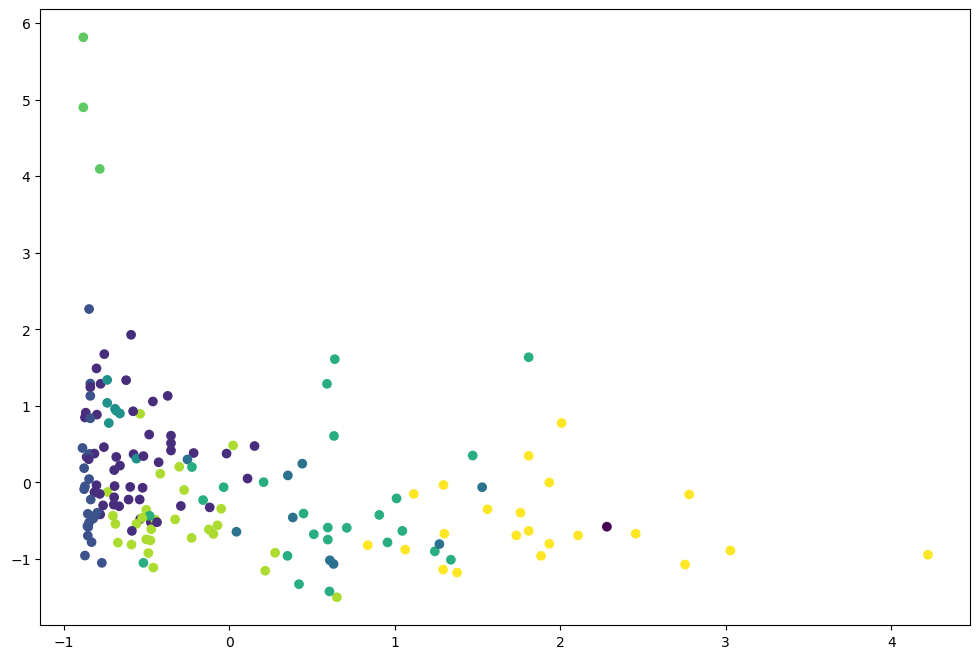

In [10]:
plt.figure(figsize=(12, 8))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=labels, cmap='viridis')

En este gráfico, cada punto es un cliente, y los colores representan los clusters.

Además, podrías también calcular los centroides de los clusters y visualizarlos en el mismo gráfico. Los centroides son el "centro" de cada cluster y pueden dar una idea de lo que representa cada cluster.

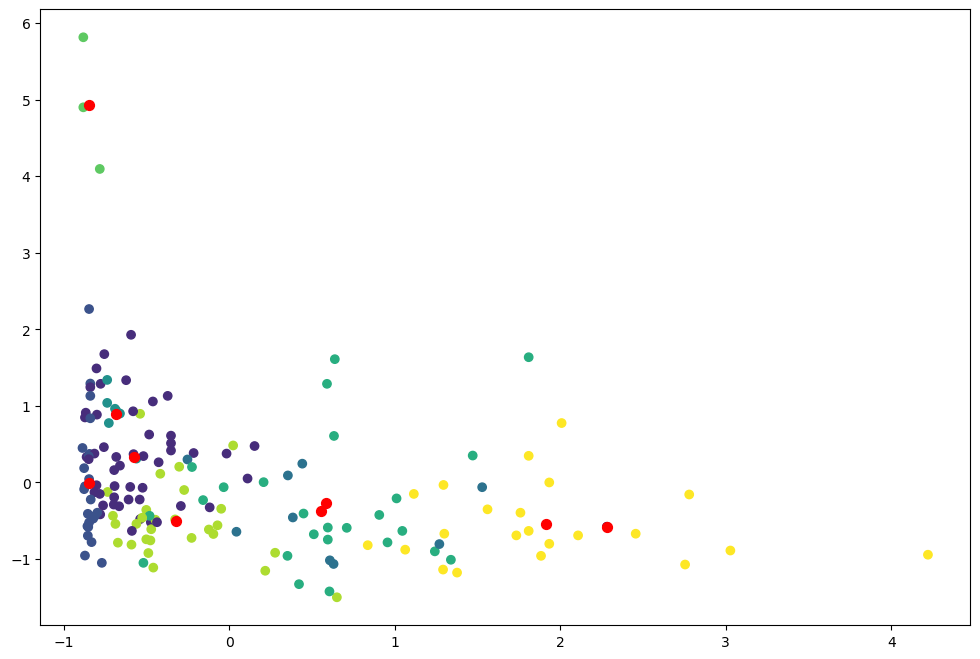

In [11]:
# Calcular los centroides

centroids = model.cluster_centers_

# Visualizar los centroides

plt.figure(figsize=(12, 8))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)